In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [221]:
V_T = 25.8563*1e-3
n = 1
I_S = 7.5 * 1e-6
R = 1e3

In [80]:
def f_IK(x, I=I_S*R, K=V_T*n):
    return I*(np.exp(x/K)-np.exp(-x/K))+x

In [144]:
x = np.linspace(-.5, .5, 100)
y = f_IK(x)

Text(0, 0.5, 'V_O')

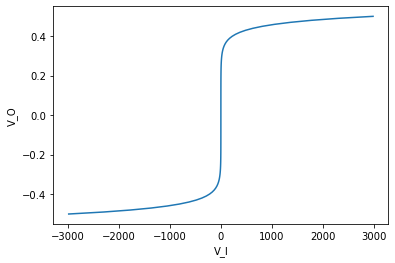

In [145]:
plt.plot(y, x)
plt.xlabel("V_I")
plt.ylabel("V_O")

In [146]:
x_ = np.linspace(-3, 3, 300)
y_ = f_IK(x_)
f_inv = interpolate.interp1d(y_, x_)

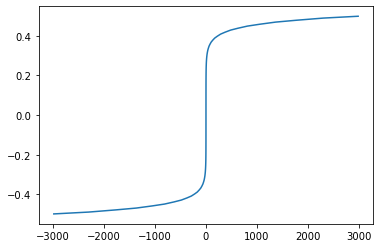

In [147]:
plt.plot(y, f_inv(y))

In [148]:
t = np.linspace(0, 6*np.pi, 100)
r = np.sin(t)

Text(0.5, 0, 't')

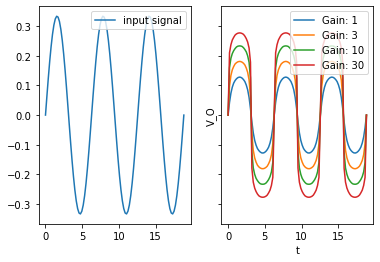

In [149]:
rs = []
gains = [1, 3, 10, 30]
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)
r = np.sin(t)/3
axs[0].plot(t, r, label="input signal")
axs[0].legend(loc="upper right")
plt.ylabel("input signal")
plt.xlabel("time")
for a in gains:
    r_g = f_inv(a*r)
    axs[1].plot(t, r_g, label=f"Gain: {a}")
axs[1].legend(loc="upper right")
plt.ylabel("V_O")
plt.xlabel("t")

# Soft clipping

In [332]:
R_2 = .1
R = 5
n=1

In [333]:
x_ = np.linspace(-3, 3, 300)
y_ = f_IK(x_, I=I_S*R, K=V_T*n)
f_inv = interpolate.interp1d(y_, x_)

Text(0, 0.5, 'V_O')

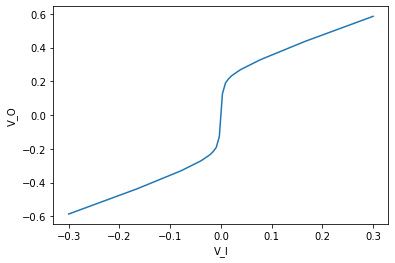

In [345]:
y_s = np.linspace(-.3, .3, 100)
plt.plot(y_s, f_inv(y_s*R/R_2)+y_s)
plt.xlabel("V_I")
plt.ylabel("V_O")

In [246]:
t = np.linspace(0, 6*np.pi, 100)
r = np.sin(t)*.4

Text(0.5, 0, 't')

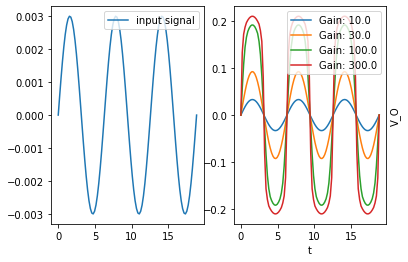

In [351]:
rs = []
Rs = [1, 3, 10, 30]
fig, axs = plt.subplots(nrows=1, ncols=2)
v = np.sin(t)*3e-3
axs[0].plot(t, v, label="input signal")
axs[0].legend(loc="upper right")
plt.ylabel("input signal")
plt.xlabel("time")
for a in Rs:
    x_ = np.linspace(-3, 3, 300)
    y_ = f_IK(x_, I=I_S*a, K=V_T*n)
    gain = a/R_2
    f_inv = interpolate.interp1d(y_, x_)
    v_g = f_inv(v*a/R_2)+v
    axs[1].plot(t, v_g, label=f"Gain: {gain}")
axs[1].legend(loc="upper right")
plt.ylabel("V_O")
axs[1].yaxis.set_label_position("right")
plt.xlabel("t")